# Import Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

# Get Data

In [83]:
df=pd.read_csv("Network_Intrusion_Train.csv")

In [84]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

# Feature Engineering

# Label Encoding

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
label=LabelEncoder()

In [88]:
df["protocol_type"]=label.fit_transform(df["protocol_type"])

In [89]:
df["service"]=label.fit_transform(df["service"])
df["flag"]=label.fit_transform(df["flag"])
df["class"]=label.fit_transform(df["class"])

In [90]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,0
25188,0,1,19,9,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,0
25189,0,1,46,1,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
25190,0,1,38,5,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0


<Axes: >

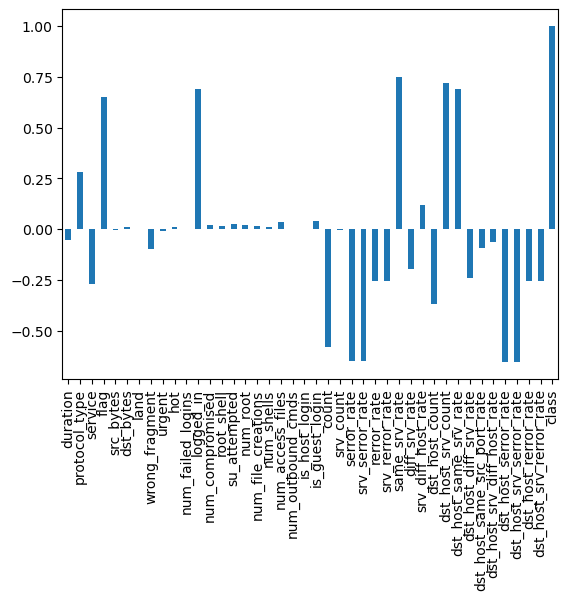

In [91]:
df.corr()['class'].plot(kind='bar')

In [92]:
df.corr()["class"]

duration                      -0.050901
protocol_type                  0.283653
service                       -0.270494
flag                           0.651309
src_bytes                     -0.005743
dst_bytes                      0.010949
land                          -0.000605
wrong_fragment                -0.097625
urgent                        -0.006743
hot                            0.012839
num_failed_logins             -0.000028
logged_in                      0.688084
num_compromised                0.018620
root_shell                     0.018579
su_attempted                   0.025851
num_root                       0.019753
num_file_creations             0.018322
num_shells                     0.013454
num_access_files               0.036999
num_outbound_cmds                   NaN
is_host_login                       NaN
is_guest_login                 0.038662
count                         -0.578790
srv_count                     -0.002370
serror_rate                   -0.649952


# EDA

In [93]:
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,25192.000000,25192.000000,25192.000000,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,1.053827,29.039139,6.982455,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,0.533860
std,2686.555640,0.426998,15.555601,2.679322,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,0.498862
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,19.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,22.000000,9.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,46.000000,9.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42862.000000,2.000000,65.000000,10.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<Axes: xlabel='class', ylabel='count'>

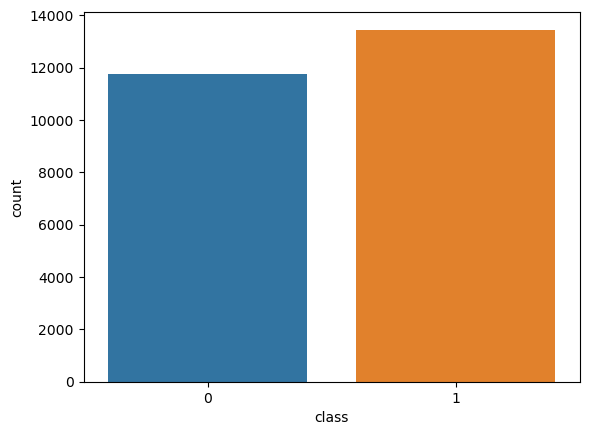

In [95]:
sns.countplot(x=df["class"])
#here 0 means anomaly and 1 means normal

Text(0.5, 1.0, 'Distribution of protocol_type}')

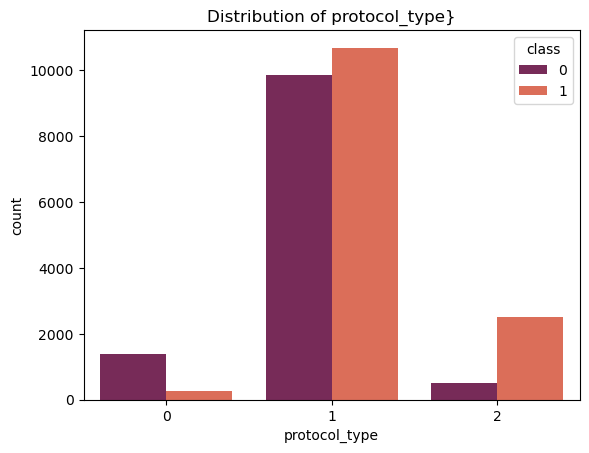

In [96]:
sns.countplot(x=df["protocol_type"], data=df, hue='class', palette=("rocket"))
pt.title(f'Distribution of {"protocol_type}"}')

# 0=Icmp  1=Tcp  2=Udp

<Axes: >

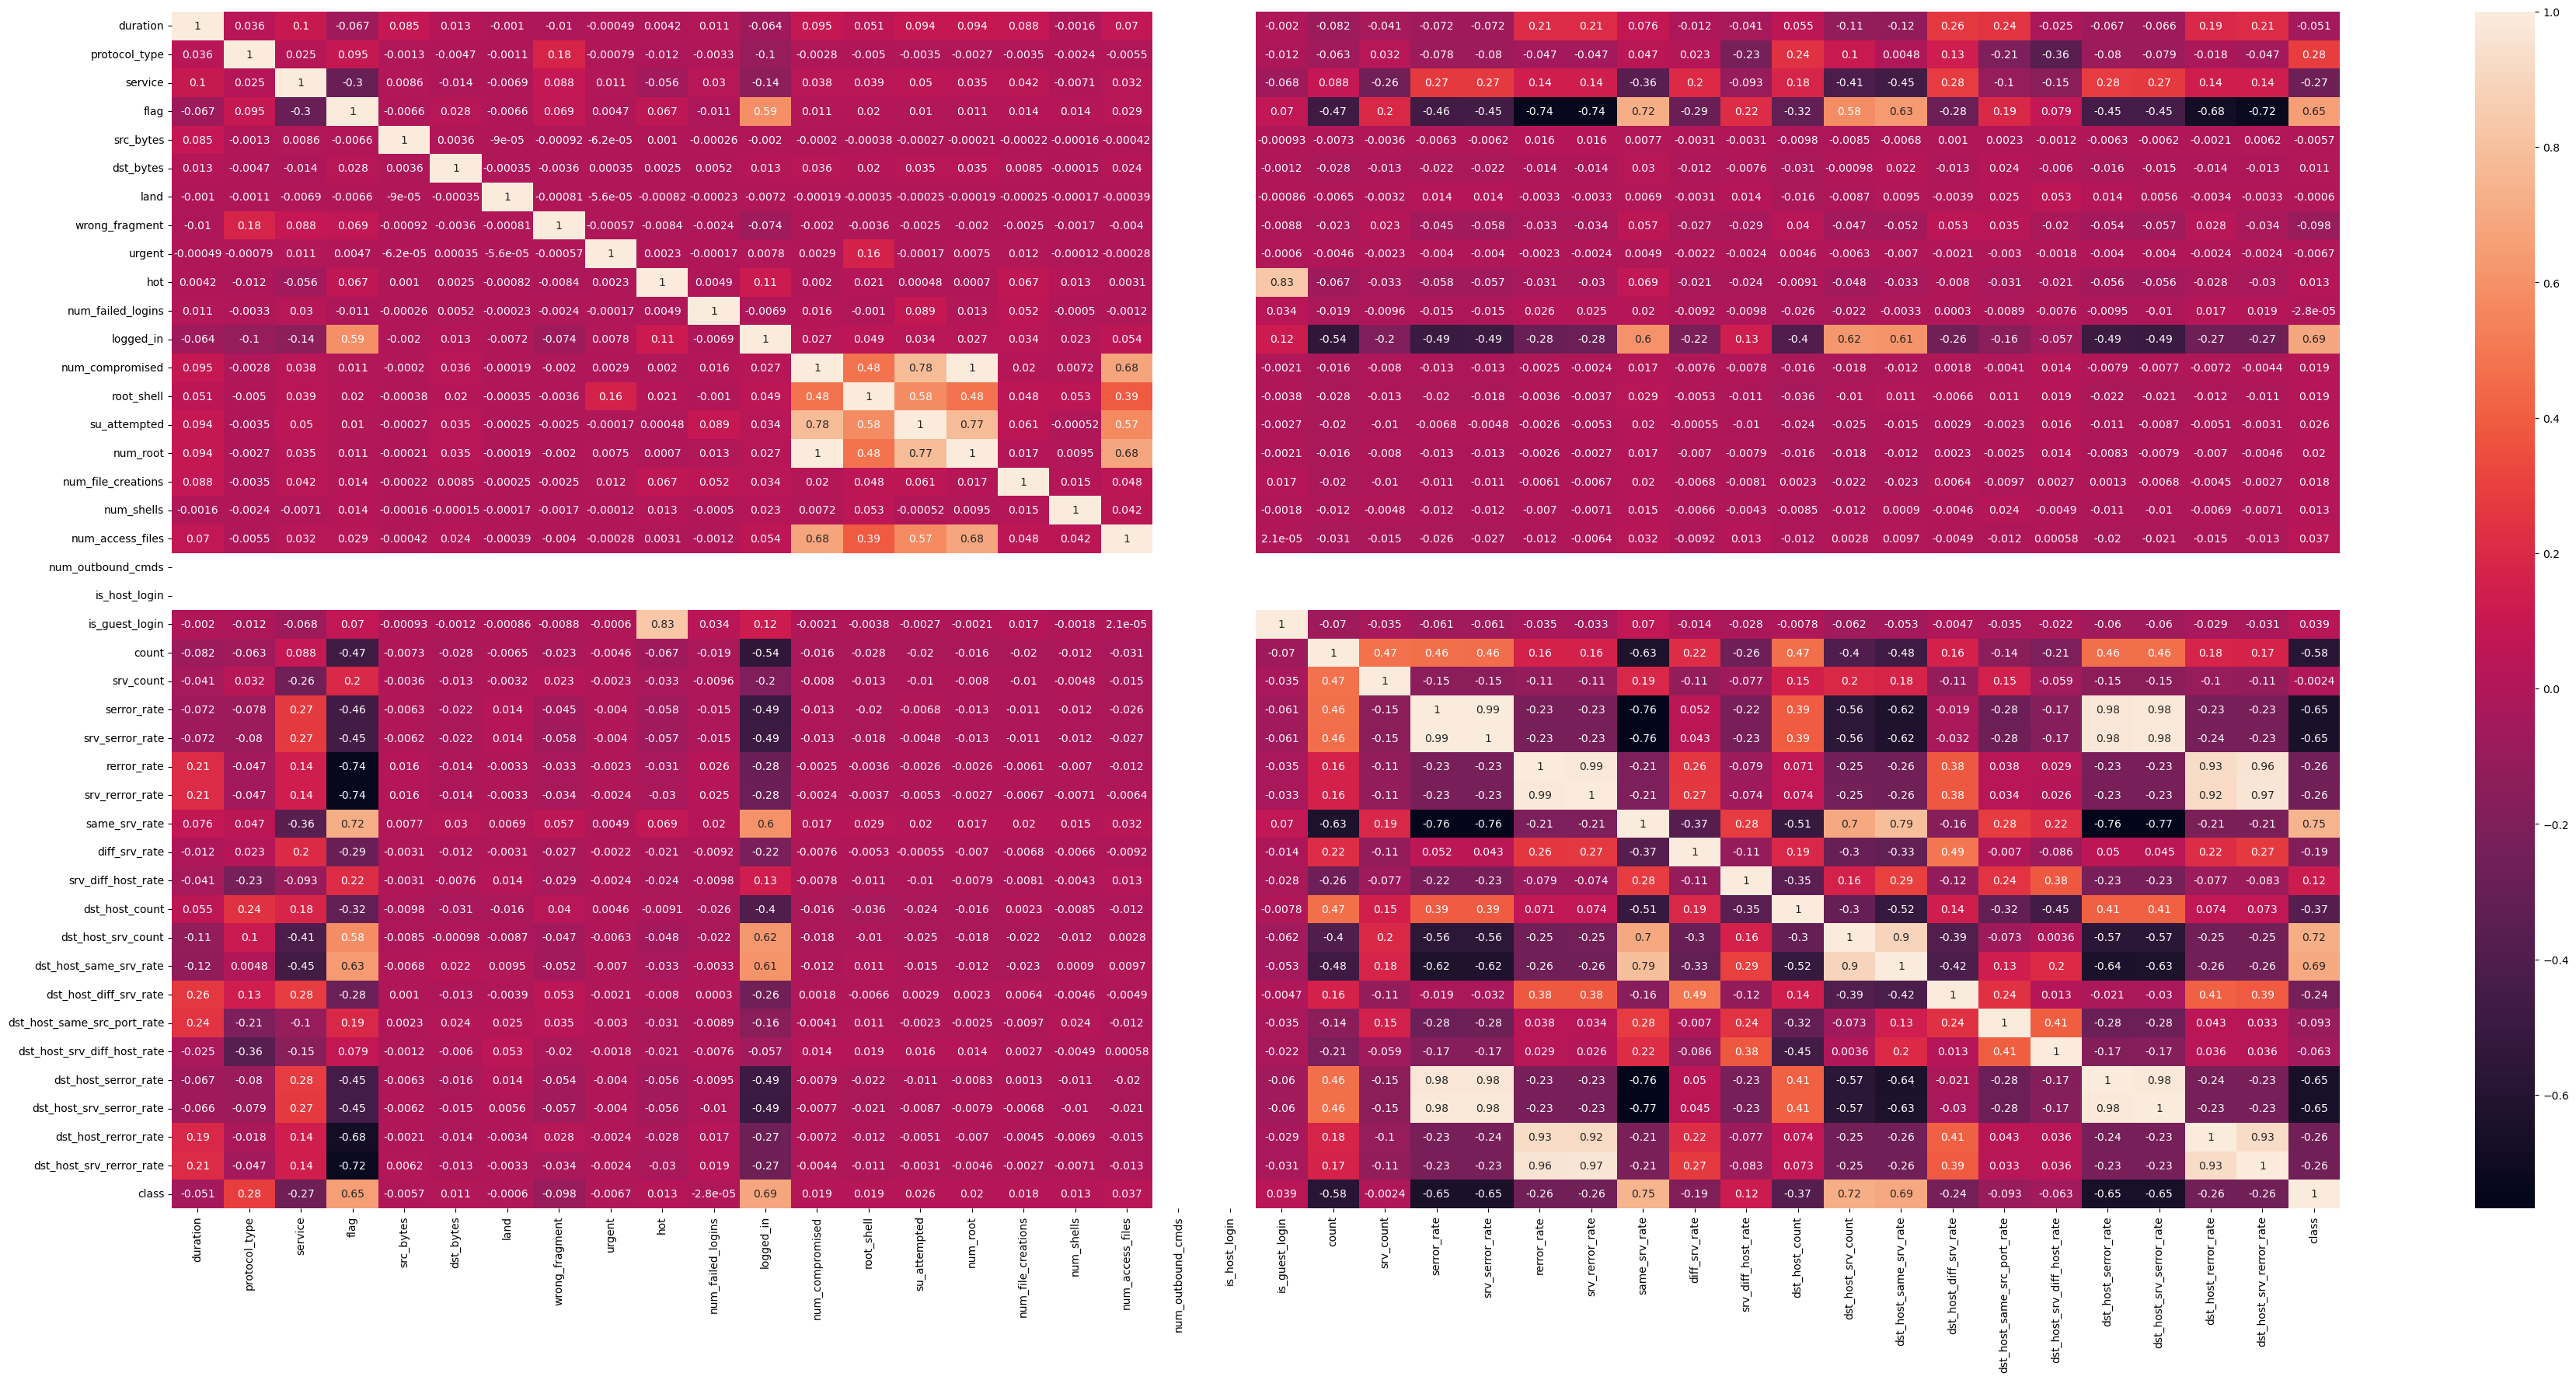

In [97]:
pt.figure(figsize=(45,20))
sns.heatmap(data=df.corr(),annot=True)


# split train test

In [98]:
x=df.drop("class",axis=1)

In [99]:
y=df["class"]

# Standardization

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scale=StandardScaler()

In [102]:
x_scale=scale.fit_transform(x)


# Train Test split

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.1,random_state=101)

In [105]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)   # fit only on training data
x_test = scaler.transform(_test)        # transform test data with same scaler


# Model

# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression 

In [107]:
model=LogisticRegression()

In [108]:
model.fit(x_train,y_train)

C:\Users\avich\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
pred=model.predict(x_test)

In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [111]:
acc=accuracy_score(y_test,pred)

In [112]:
acc

0.9519841269841269

In [113]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1159
           1       0.95      0.96      0.96      1361

    accuracy                           0.95      2520
   macro avg       0.95      0.95      0.95      2520
weighted avg       0.95      0.95      0.95      2520



In [114]:
cm1=confusion_matrix(y_test,pred)
cm1

array([[1087,   72],
       [  49, 1312]], dtype=int64)

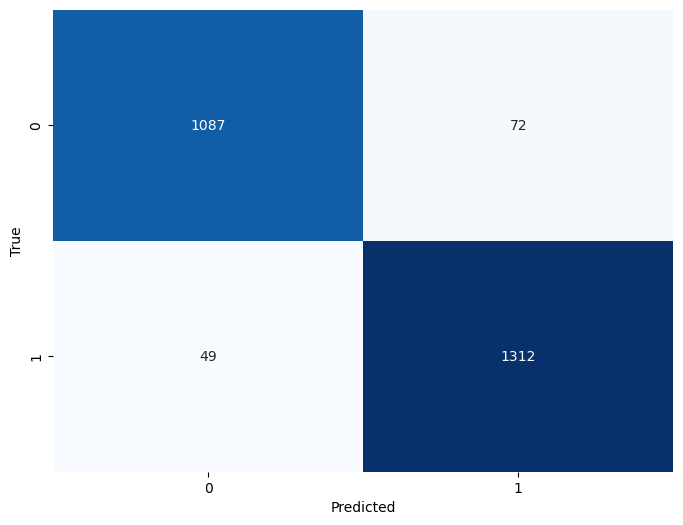

In [115]:
# Plot confusion matrix
pt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
pt.xlabel('Predicted')
pt.ylabel('True')
pt.show()

# Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
model2=DecisionTreeClassifier()

In [118]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [119]:
pred2=model2.predict(x_test)

In [120]:
acc2=accuracy_score(y_test,pred2)

In [121]:
acc2

0.9940476190476191

In [122]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1159
           1       0.99      0.99      0.99      1361

    accuracy                           0.99      2520
   macro avg       0.99      0.99      0.99      2520
weighted avg       0.99      0.99      0.99      2520



In [123]:
cm3=confusion_matrix(y_test,pred2)
cm3

array([[1151,    8],
       [   7, 1354]], dtype=int64)

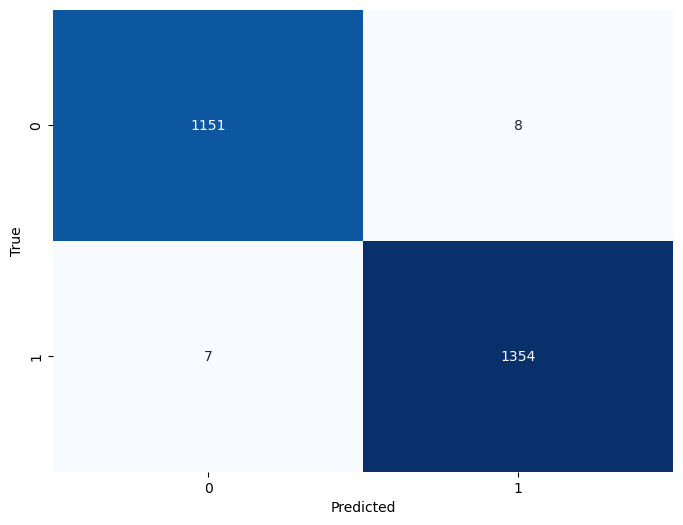

In [124]:
# Plot confusion matrix
pt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False)
pt.xlabel('Predicted')
pt.ylabel('True')
pt.show()

# Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
model3=RandomForestClassifier(n_estimators=50)

In [127]:
model3.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [128]:
pred3=model3.predict(x_test)

In [129]:
acc3=accuracy_score(y_test,pred3)
acc3

0.9968253968253968

In [130]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1159
           1       1.00      1.00      1.00      1361

    accuracy                           1.00      2520
   macro avg       1.00      1.00      1.00      2520
weighted avg       1.00      1.00      1.00      2520



In [131]:
cm4=confusion_matrix(y_test,pred3)
cm4

array([[1153,    6],
       [   2, 1359]], dtype=int64)